# Generalization, Overfitting and Underfitting

## 1. Model KNN

Analyze data bankloan.csv
- Apply KNN Classifier
    - Target    : Default
    - Features  : Employ, Debtinc, Creddebt, Othdebt
- Using Different K (1, 3, 5, ....., 100) Apply scaling and Validate the model using accuracy in 20% testing data and 80% training data
- Compare accuracies obtained from training data and testing data

## Library

In [1]:
# DATAFRAME
import pandas as pd
import numpy as np

#VISUALIZATION
import seaborn as sns
import matplotlib.pyplot as plt

#PREPROCESSING AND SOLITTING
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# KNN
from sklearn.neighbors import KNeighborsClassifier

# PENGUKURAN PERFORMA
from sklearn.metrics import accuracy_score

## 1.1 Data

In [2]:
bankloan = pd.read_csv(r'C:\Users\dheof\Desktop\Help\Purwadhika\Csv_Files\bankloan.csv')
bankloan

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1
696,29,2,6,4,21,11.5,0.369495,2.045505,0
697,33,1,15,3,32,7.6,0.491264,1.940736,0
698,45,1,19,22,77,8.4,2.302608,4.165392,0


In [5]:
x = bankloan[['employ', 'debtinc', 'creddebt', 'othdebt']]
y = bankloan['default']


## 1.2 Data Splitting

Data    : 0 = 90%, 1 = 10%
<br>
Train   : 0 = 90%, 1 = 10%
<br>
Test    : 0 = 90%, 1 = 10%

In [6]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.2,
    random_state = 2020,
    stratify = y
)

## 1.3 Scaling

Data Splitting --> Scaling
<br>
Hasil pengukuran akurasi lebih valid

In [7]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

## 1.4 Generalization Perfomance

In [8]:
k = range(1, 100, 2) # 1, 3, 5, 7, ...., 99
testing_accuracies = []
training_accuracies = []
score = 0

for i in k:
    # Fitting Model
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train_scaled, y_train)

    # Test Accuracies
    y_test_pred = knn.predict(x_test_scaled)
    acc_test = accuracy_score(y_test, y_test_pred)
    testing_accuracies.append(acc_test)

    # Train Accuracies
    y_train_pred = knn.predict(x_train_scaled)
    acc_train = accuracy_score(y_train, y_train_pred)
    training_accuracies.append(acc_train)

    # Penentuan K Terbaik
    if score < acc_test:
        score = acc_test
        best_k = i    

In [12]:
print('Best K adalah', best_k)
print('Best Score adalah', score)

Best K adalah 31
Best Score adalah 0.8285714285714286


C:\Users\dheof\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dheof\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dheof\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dheof\anacond

Text(0, 0.5, 'Accuracy')

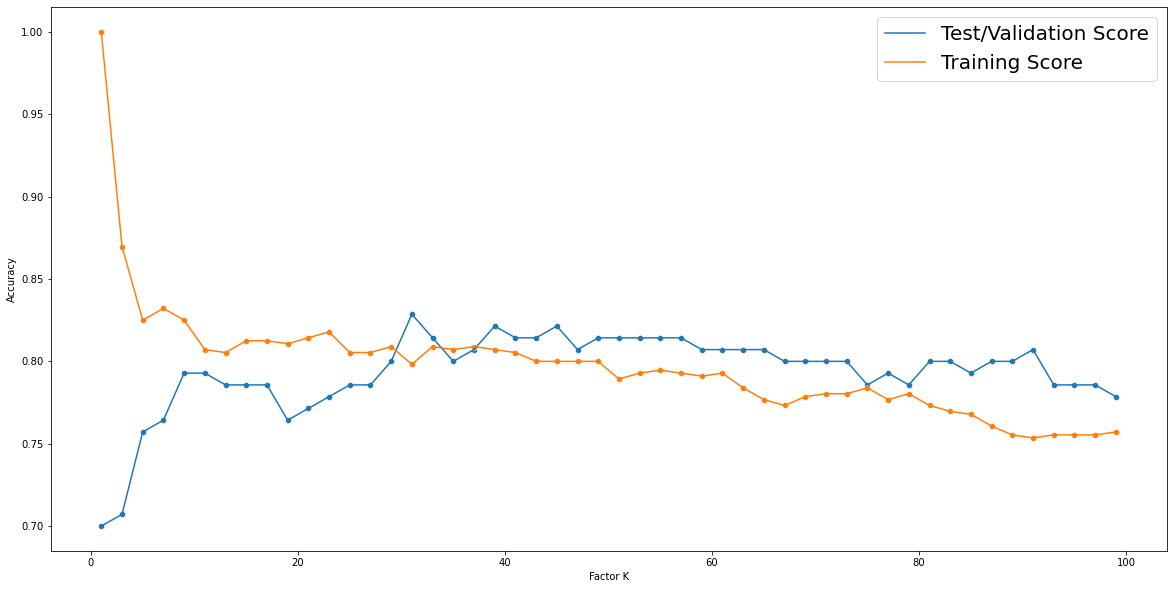

In [20]:
plt.figure(figsize=(20,10))

sns.lineplot(k, testing_accuracies)
sns.scatterplot(k, testing_accuracies)

sns.lineplot(k, training_accuracies)
sns.scatterplot(k, training_accuracies)

plt.legend(['Test/Validation Score', 'Training Score'], fontsize = 20)
plt.xlabel('Factor K')
plt.ylabel('Accuracy')

Highlight:
1. K = 1. Score Train 100%, score test 70%. Ketika ada data baru KNN hanya mampu memprediksi 70 dari 100 anggur.
2. Semakin tinggi K dari 1, 3, 5, ...., 31, 33. KNN menuju optimal/general masih overfitting (test score < train score)
3. 30an akhir 40an KKN sudah melewati nilai optimal. KNN menjadi semakin underfitting )test score train sama-sama memburuk)
4. K terbaik K paling optimal adalah K = 31. Kita anggap letak KNN dimana kondisi generalissasi paling optimal.
5. K yang digunakan jangan terlalu tinggi ataupun terlalu rendah
    - K rendah overfitting
    - K tinggi underfitting

## 2. Model Decision Tree

Analyze data bankloan.csv
- Apply Decision Tree Classifier
    - Target    : Default
    - Features  : Employ, Debtinc, Creddebt, Othdebt
- Using different maximum depth of the tree (1, 2, 3, ...., 25): Validate the model using accuracy in 20% testing data and 80% training data
- Compare accuracies obtained from training data and testing data
- You may try another hyperparameter such as minimum samples split, minimum samples leaf, etc.

## 2.1 Library

In [21]:
from sklearn.tree import DecisionTreeClassifier

## 2.2 Generalization Perfomance

In [22]:
depth = range(1, 25) # 1,2,3...,25
testing_accuracies = []
training_accuracies = []
score = 0

for i in depth:
    # Fitting Model
    tree = DecisionTreeClassifier(max_depth= i, criterion = 'entropy')
    tree.fit(x_train, y_train)

    # Test Accuracies
    y_test_pred = tree.predict(x_test)
    acc_test = accuracy_score(y_test, y_test_pred)
    testing_accuracies.append(acc_test)

    # Train Accuracies
    y_train_pred = tree.predict(x_train)
    acc_train = accuracy_score(y_train, y_train_pred)
    training_accuracies.append(acc_train)

    # Penentuan Debt Terbaik
    if score < acc_test:
        score = acc_test
        best_depth = i    

In [23]:
print('Best Max Depth', best_depth)
print('Best Score', score)

Best Max Depth 8
Best Score 0.7857142857142857


C:\Users\dheof\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dheof\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dheof\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dheof\anacond

Text(0, 0.5, 'Accuracy')

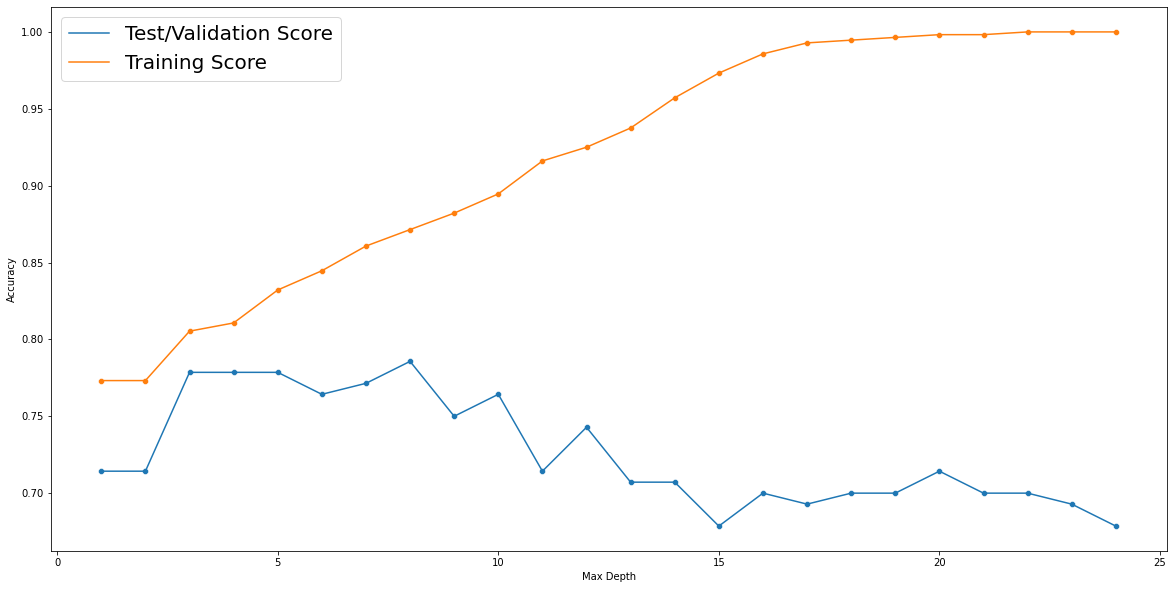

In [24]:
plt.figure(figsize=(20,10))

sns.lineplot(depth, testing_accuracies)
sns.scatterplot(depth, testing_accuracies)

sns.lineplot(depth, training_accuracies)
sns.scatterplot(depth, training_accuracies)

plt.legend(['Test/Validation Score', 'Training Score'], fontsize = 20)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')

Interpretasi
1. Max Depth, maksimum kedalaman pohon
1. Terlalu Rendah (Depth 1 2 3) --> Underfitting (Train Score maupun Test Score masih sama-sama rendah)
1. Terlalu Tinggi (Depth 4 5 dan seterusnya) --> Overfitting (Training score > test score)
1. Letak model optimal Depth = 8 dengan score 0.7857 (Training score > test score)
    1. Decision Tree memang cenderung menghasilkan model overfitting 
1. Depth sudah sangat tinggi hingga pada titik tertentu score pada train dapat mencapai 100, sedangkan test score semakin buruk.

Kesimpulan
Penentuan max depth: 
1. jangan terlalu tinggi --> Overfitting
2. jangan terlalu rendah --> Underfitting

## 3. Ridge Regression

Analyze data boston dataset from sklearn
- Apply Ridge Regression
    - Target  : Target(House Price)
    - Features: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT, MEDV
- Using different alpha (100000, 10000, 1000, 100, 10, 1, 0.1, 0.001): Validate the model using MSE in 20% testing data and 80% training data
- Compare MSE obtained from training data and testing data

## 3.1 Library

In [25]:
# DATAFRAME
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt

# DATA
from sklearn.datasets import load_boston

# PREPROCESS
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# MODEL
from sklearn.linear_model import Ridge, Lasso

# METRICS
from sklearn.metrics import mean_squared_error

## 3.2 Data

In [2]:
boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
df_boston = pd.DataFrame(data = boston['data'], columns = boston['feature_names'])
df_boston['y'] = pd.Series(boston['target'])
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [7]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Keterangan:
1. CRIM     : Tingkat kejahatan
2. ZN       : Proporsi tempat tinggal / bangunan yang luasnya > 25000 kaki persegi
3. INDUS    : Proporsi lahan (hektar) yang termasuk bisnis non-retail
4. CHAS     : Apakah pemukiman dekat dengan sungai
5. NOX      : Konsentrasi N0 di udara
6. RM       : Rata-rata ruangan dari setiap rumah yang ada di pemukiman
7. AGE      : Proporsi hunian yang terisi huniannya dibangun sebelum tahun 1940
8. DIS      : Rata-rata jarak hunian 5 pusat perkantoran di boston
9. RAD      : Tingkat aksesibilitas terhadap jalan raya atau jalan tol
10. TAX     : Tarif pajak properti
11. PTRATIO : Ratio antara siswa dan guru
12. B       : Mengindikasikan seberapa banyak orang kulit hitam di pemukiman
13. LSTAT   : Mengindikasikan ada berapa banyak masyarakat kelas bawah
14. MEDV / Y: Kisaran harga rumah di pemukiman ($1000) dalam median

## 3.3 Data Splitting

In [9]:
x = df_boston.drop(columns = 'y')
y = df_boston['y']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.2,
    random_state = 1899
)

## 3.3 Scaling

In [11]:
scaler = MinMaxScaler()
scaler.fit(x_train) # agar hasil pengukuran performa pada data test/validasi lebih valid
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

## 3.4 Model Ridge

In [13]:
hyperparam_alpha = [100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
test_mse = []
train_mse = []
score = 1000

for i in hyperparam_alpha:
    #training model
    ridge = Ridge(alpha = i)
    ridge.fit(x_train_scaled, y_train)

    #score train
    y_pred_train = ridge.predict(x_train_scaled)
    mse_train = mean_squared_error(y_train, y_pred_train)
    train_mse.append(mse_train)

    # score test
    y_pred_test = ridge.predict(x_test_scaled)
    mse_test = mean_squared_error(y_test, y_pred_test)
    test_mse.append(mse_test)

    # score terbaik
    if score > mse_test:
        score = mse_test
        best_alpha = i
    

In [14]:
print('Score terbaik adalah', score)
print('Alpha terbaik adalah', best_alpha)

Score terbaik adalah 27.686878880361693
Alpha terbaik adalah 1


C:\Users\dheof\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dheof\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dheof\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dheof\anacond

<function matplotlib.pyplot.show(close=None, block=None)>

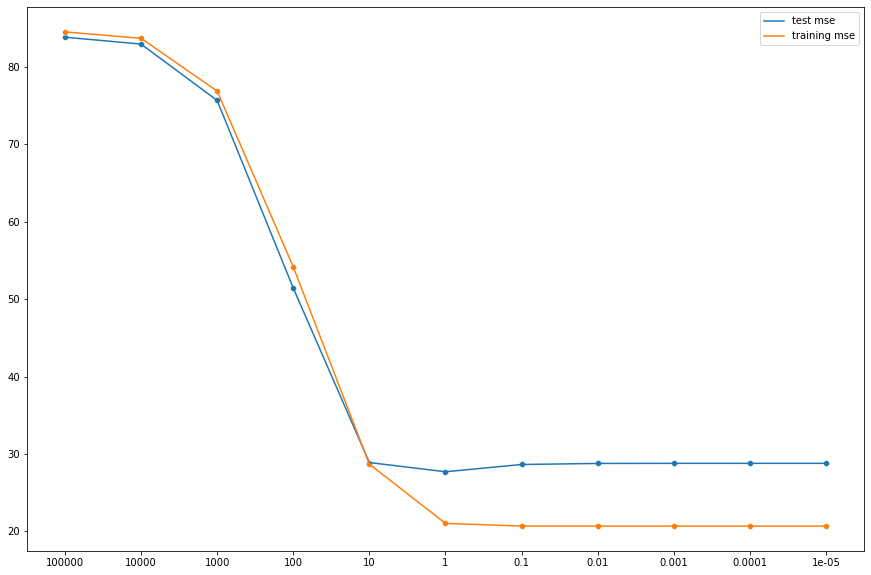

In [23]:
length = range(len(hyperparam_alpha))

plt.figure(figsize=(15,10))

sns.lineplot(length, test_mse)
sns.scatterplot(length, test_mse)

sns.lineplot(length, train_mse)
sns.scatterplot(length, train_mse)

plt.legend(['test mse', 'training mse' ])
plt.xticks(length, hyperparam_alpha)
plt.show

1. Alpha besar (100K, 10K, ...., 10) MODEL MASIH UNDERFITTING. MSE TRAIN DAN TEST BESAR
1. ALPHA MENURUN, MODEL MENUJU GENERAL YANG BAIK
1. ALPHA TERBAIK = 1
1. ALPHA < 1 MODEL SEMAKIN OVERFITTING. TRAINING SEMAKIN BAIK SEDANGKAN TESTING SEMAKIN BURUK

In [24]:
pd.DataFrame(
    {
        'alpha': hyperparam_alpha,
        'score_train': train_mse,
        'score_test' : test_mse
    }
)

,alpha,score_train,score_test
0,100000.00000,84.542598,83.858801
1,10000.00000,83.709846,82.969277
2,1000.00000,76.889003,75.677980
3,100.00000,54.172112,51.428245
4,10.00000,28.680369,28.878246
5,1.00000,21.012610,27.686879
6,0.10000,20.669433,28.627257
7,0.01000,20.664355,28.761537
8,0.00100,20.664301,28.775542
9,0.00010,20.664301,28.776948


1. ALPHA TERLALU BESAR UNDERFITTING
1. ALPHA TERLALU KECIL OVERFITTING
1. NILAI ALPHA OPTIMAL ADALAH 1 UNTUK KASUS INI. MSE 27.68
1. SWEAT SPOT: MUNGKIN TERJADI TRAIN SEDIKIT LEBIH BAIK DARI PADA TEST


## 4. LASSO

In [26]:
hyperparam_alpha = [100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
test_mse = []
train_mse = []
score = 1000

for i in hyperparam_alpha:
    #training model
    lasso = Lasso(alpha = i)
    lasso.fit(x_train_scaled, y_train)

    #score train
    y_pred_train = lasso.predict(x_train_scaled)
    mse_train = mean_squared_error(y_train, y_pred_train)
    train_mse.append(mse_train)

    # score test
    y_pred_test = lasso.predict(x_test_scaled)
    mse_test = mean_squared_error(y_test, y_pred_test)
    test_mse.append(mse_test)

    # score terbaik
    if score > mse_test:
        score = mse_test
        best_alpha = i

In [27]:
print('Score terbaik adalah', score)
print('Alpha terbaik adalah', best_alpha)

Score terbaik adalah 28.77078655766108
Alpha terbaik adalah 0.001


C:\Users\dheof\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dheof\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dheof\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dheof\anacond

<function matplotlib.pyplot.show(close=None, block=None)>

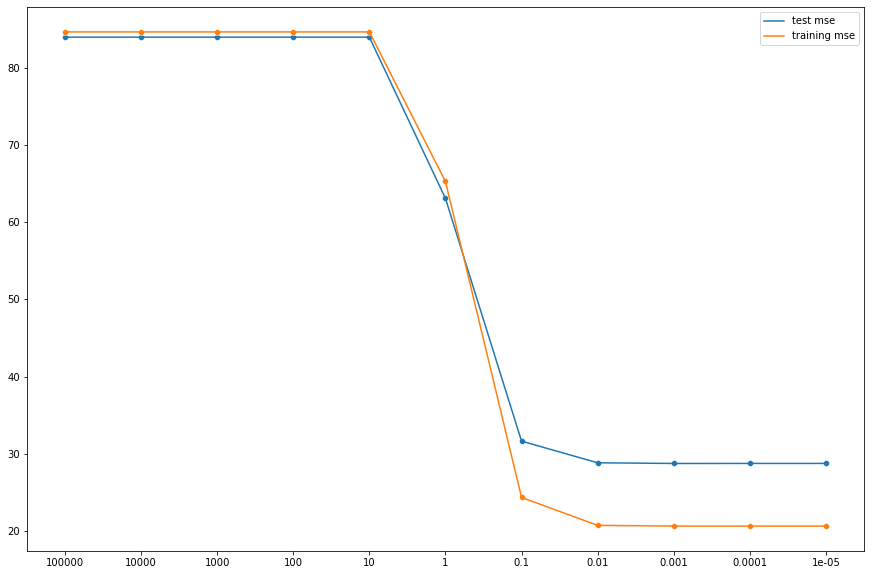

In [28]:
length = range(len(hyperparam_alpha))

plt.figure(figsize=(15,10))

sns.lineplot(length, test_mse)
sns.scatterplot(length, test_mse)

sns.lineplot(length, train_mse)
sns.scatterplot(length, train_mse)

plt.legend(['test mse', 'training mse' ])
plt.xticks(length, hyperparam_alpha)
plt.show

1. ALPHA BESAR > 0.001 (100K, 10K, .... 0.01) MODEL UNDERFITTING, KARENA TEST MAUPUN TRAIN SAMA SAMA BURUK
1. OPTIMAL/SWEET SPOT ALPHA = 0.001, MSE = 28.77
1. ALPHA KECIL < 0.001 (0.0001, 0.00001....) MODEL OVERFITTING, KARENA TEST M

In [29]:
pd.DataFrame(
    {
        'alpha': hyperparam_alpha,
        'score_train': train_mse,
        'score_test' : test_mse
    }
)

,alpha,score_train,score_test
0,100000.00000,84.637191,83.959835
1,10000.00000,84.637191,83.959835
2,1000.00000,84.637191,83.959835
3,100.00000,84.637191,83.959835
4,10.00000,84.637191,83.959835
5,1.00000,65.273673,63.081291
6,0.10000,24.374053,31.660629
7,0.01000,20.759526,28.859161
8,0.00100,20.665486,28.770787
9,0.00010,20.664313,28.776328


Kesimpulan
1. Alpha besar --> UNDERFITTING (TRAIN DAN TEST SAMA SAMA BURUK)
1. ALPHA KECIL --> OVERFITTING (TRAIN MEMBAIK, TEST MEMBURUK)
1. OPTIMAL ALPHA PADA KASUS INI DENGAN METODE LASSO ALPHA = 0.001